In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts

from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
df = pd.read_csv('HomeC.csv',low_memory=False)

In [4]:
df.head() 

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
time                   503911 non-null object
use [kW]               503910 non-null float64
gen [kW]               503910 non-null float64
House overall [kW]     503910 non-null float64
Dishwasher [kW]        503910 non-null float64
Furnace 1 [kW]         503910 non-null float64
Furnace 2 [kW]         503910 non-null float64
Home office [kW]       503910 non-null float64
Fridge [kW]            503910 non-null float64
Wine cellar [kW]       503910 non-null float64
Garage door [kW]       503910 non-null float64
Kitchen 12 [kW]        503910 non-null float64
Kitchen 14 [kW]        503910 non-null float64
Kitchen 38 [kW]        503910 non-null float64
Barn [kW]              503910 non-null float64
Well [kW]              503910 non-null float64
Microwave [kW]         503910 non-null float64
Living room [kW]       503910 non-null float64
Solar [kW]             503910 non-null float

In [6]:
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [7]:
df.shape

(503911, 32)

In [8]:
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [9]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [10]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [11]:
#removing the truncated record
#removing last row
df=df[:-1]
df.shape

(503910, 32)

In [12]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [13]:
df.columns = [col.replace(' [kW]', '') for col in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [14]:
df['Total_Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Average_Kitchen'] = df[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].mean(axis=1)

In [15]:
df.drop(['Furnace 1','Furnace 2','Kitchen 12', 'Kitchen 14', 'Kitchen 38'],axis=1,inplace=True)

In [16]:
df['time'].head()

0    1451624400
1    1451624401
2    1451624402
3    1451624403
4    1451624404
Name: time, dtype: object

In [17]:
#given that the time is in UNIX format
time = pd.to_datetime(df['time'],unit='s')
time.head()

0   2016-01-01 05:00:00
1   2016-01-01 05:00:01
2   2016-01-01 05:00:02
3   2016-01-01 05:00:03
4   2016-01-01 05:00:04
Name: time, dtype: datetime64[ns]

In [18]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(df), freq='min')
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)

In [19]:
df.shape

(503910, 29)

In [20]:
df.drop(['gen'],axis=1,inplace=True)
#data.drop('gen',axis=1)

In [21]:
df.drop(['House overall'],axis=1,inplace=True)

In [22]:
df.head(2)

,time,use,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Total_Furnace,Average_Kitchen
2016-01-01 05:00:00,1451624400,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000189
2016-01-01 05:01:00,1451624401,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000189


# Data visualization

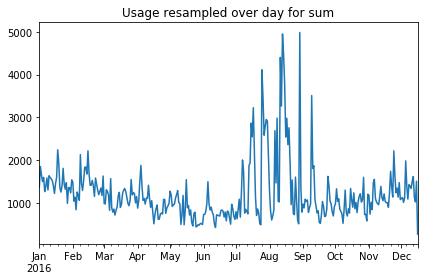

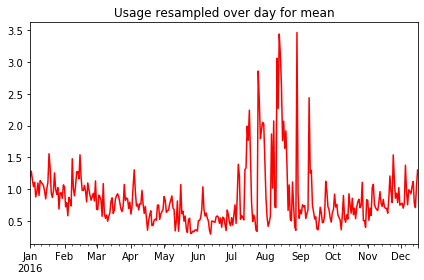

In [23]:
df.use.resample('D').sum().plot(title='Usage resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.use.resample('D').mean().plot(title='Usage resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

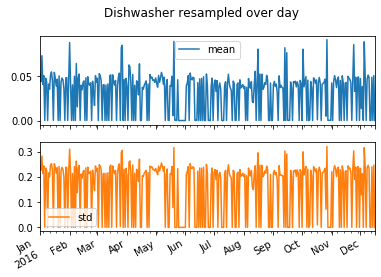

In [24]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.Dishwasher.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Dishwasher resampled over day')
plt.show()

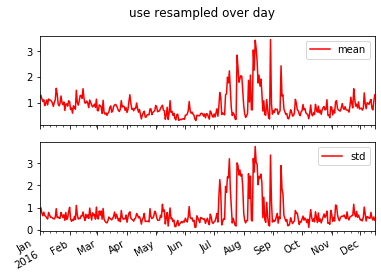

In [25]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.use.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='use resampled over day', color='red')
plt.show()

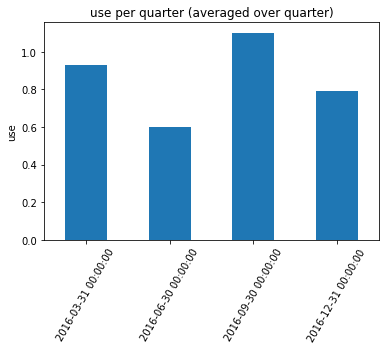

In [26]:
## Mean of 'Global_active_power' resampled over quarter
df['use'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('use')
plt.title('use per quarter (averaged over quarter)')
plt.show()

In [27]:
df.columns

Index(['time', 'use', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Total_Furnace', 'Average_Kitchen'],
      dtype='object')

In [28]:
df.drop(['temperature','icon','humidity','visibility','summary','apparentTemperature','pressure','windSpeed','cloudCover'],axis=1,inplace=True)

In [29]:
df.drop(['windBearing','precipIntensity','dewPoint','precipProbability'],axis=1,inplace=True)

In [30]:
df.columns

Index(['time', 'use', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar',
       'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'Total_Furnace', 'Average_Kitchen'],
      dtype='object')

### Machine-Leaning: LSTM Data Preparation and feature engineering

#### * I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data. 
I will frame the supervised learning problem as predicting the use at the current time (t) given the use measurement and other features at the prior time step.

In [31]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

### * In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.   

In [32]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(8399, 13)

In [33]:
df_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8399 entries, 2016-01-01 05:00:00 to 2016-12-16 03:00:00
Freq: H
Data columns (total 13 columns):
use                8399 non-null float64
Dishwasher         8399 non-null float64
Home office        8399 non-null float64
Fridge             8399 non-null float64
Wine cellar        8399 non-null float64
Garage door        8399 non-null float64
Barn               8399 non-null float64
Well               8399 non-null float64
Microwave          8399 non-null float64
Living room        8399 non-null float64
Solar              8399 non-null float64
Total_Furnace      8399 non-null float64
Average_Kitchen    8399 non-null float64
dtypes: float64(13)
memory usage: 918.6 KB


In [34]:
## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [35]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
1,0.108914,0.000077,0.362694,0.096604,0.080866,0.044147,0.021399,0.001959,0.031768,0.004203,...,0.192951,0.144185,0.043433,0.021565,0.001919,0.006186,0.004519,0.005881,0.387686,0.002821
2,0.095765,0.000120,0.064833,0.192951,0.144185,0.043433,0.021565,0.001919,0.006186,0.004519,...,0.151925,0.009152,0.045004,0.018950,0.001906,0.006229,0.004549,0.005930,0.315877,0.002737
3,0.074528,0.000052,0.065017,0.151925,0.009152,0.045004,0.018950,0.001906,0.006229,0.004549,...,0.154295,0.008974,0.043736,0.018815,0.001910,0.006271,0.004565,0.005929,0.523308,0.003035
4,0.100133,0.000168,0.097422,0.154295,0.008974,0.043736,0.018815,0.001910,0.006271,0.004565,...,0.089555,0.009099,0.044737,0.017510,0.001905,0.006247,0.004608,0.005913,0.291815,0.002999
5,0.066710,0.000073,0.064980,0.089555,0.009099,0.044737,0.017510,0.001905,0.006247,0.004608,...,0.131056,0.009159,0.044187,0.018785,0.001899,0.006238,0.004528,0.005889,0.730823,0.002821


In [36]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8398 entries, 1 to 8398
Data columns (total 26 columns):
var1(t-1)     8398 non-null float64
var2(t-1)     8398 non-null float64
var3(t-1)     8398 non-null float64
var4(t-1)     8398 non-null float64
var5(t-1)     8398 non-null float64
var6(t-1)     8398 non-null float64
var7(t-1)     8398 non-null float64
var8(t-1)     8398 non-null float64
var9(t-1)     8398 non-null float64
var10(t-1)    8398 non-null float64
var11(t-1)    8398 non-null float64
var12(t-1)    8398 non-null float64
var13(t-1)    8398 non-null float64
var1(t)       8398 non-null float64
var2(t)       8398 non-null float64
var3(t)       8398 non-null float64
var4(t)       8398 non-null float64
var5(t)       8398 non-null float64
var6(t)       8398 non-null float64
var7(t)       8398 non-null float64
var8(t)       8398 non-null float64
var9(t)       8398 non-null float64
var10(t)      8398 non-null float64
var11(t)      8398 non-null float64
var12(t)      8398 non-null f

In [37]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.108914   0.000077   0.362694   0.096604   0.080866   0.044147   
2   0.095765   0.000120   0.064833   0.192951   0.144185   0.043433   
3   0.074528   0.000052   0.065017   0.151925   0.009152   0.045004   
4   0.100133   0.000168   0.097422   0.154295   0.008974   0.043736   
5   0.066710   0.000073   0.064980   0.089555   0.009099   0.044737   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.021399   0.001959   0.031768    0.004203    0.005671    0.333730   
2   0.021565   0.001919   0.006186    0.004519    0.005881    0.387686   
3   0.018950   0.001906   0.006229    0.004549    0.005930    0.315877   
4   0.018815   0.001910   0.006271    0.004565    0.005929    0.523308   
5   0.017510   0.001905   0.006247    0.004608    0.005913    0.291815   

   var13(t-1)  
1    0.003092  
2    0.002821  
3    0.002737  
4    0.003035  
5    0.002999  


In [38]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1)
1,0.108914,0.000077,0.362694,0.096604,0.080866,0.044147,0.021399,0.001959,0.031768,0.004203,0.005671,0.333730,0.003092
2,0.095765,0.000120,0.064833,0.192951,0.144185,0.043433,0.021565,0.001919,0.006186,0.004519,0.005881,0.387686,0.002821
3,0.074528,0.000052,0.065017,0.151925,0.009152,0.045004,0.018950,0.001906,0.006229,0.004549,0.005930,0.315877,0.002737
4,0.100133,0.000168,0.097422,0.154295,0.008974,0.043736,0.018815,0.001910,0.006271,0.004565,0.005929,0.523308,0.003035
5,0.066710,0.000073,0.064980,0.089555,0.009099,0.044737,0.017510,0.001905,0.006247,0.004608,0.005913,0.291815,0.002999


In [39]:
# split into train and test sets
values = reframed.values

In [40]:
n_train_time = 6000
print(n_train_time)
train = values[:n_train_time, :]
test = values[n_train_time:, :]

6000


In [41]:
train.shape

(6000, 13)

In [42]:
test.shape

(2398, 13)

In [43]:
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [44]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(6000, 1, 12) (6000,) (2398, 1, 12) (2398,)


## Model architecture

#### 1)  LSTM with 100 neurons in the first layer 
#### 3) dropout 20%
#### 4) 1 neuron in the output layer for predicting total usage. 
#### 5) The input shape will be 1 time step with 23 features.

#### 6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
#### 7) The model will be fit for 20 training epochs with a batch size of 70.


In [45]:
train_X.shape[1]

1

In [46]:
train_X.shape[2]

12

In [47]:
from keras.layers import Activation
model = Sequential()
model.add(LSTM(units=100, return_sequences=True,input_shape=(train_X.shape[1], 12)))
model.add(Activation('relu'))
model.add(LSTM(units=10))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            45200     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                4440      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 49,651
Trainable params: 49,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=64, validation_data=(test_X,test_y))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6000 samples, validate on 2398 samples
Epoch 1/150
6000/6000 [==============================] - 2s 300us/step - loss: 0.1784 - val_loss: 0.0954
Epoch 2/150
6000/6000 [==============================] - 0s 70us/step - loss: 0.0381 - val_loss: 0.0188
Epoch 3/150
6000/6000 [==============================] - 0s 66us/step - loss: 0.0118 - val_loss: 0.0142
Epoch 4/150
6000/6000 [==============================] - 0s 71us/step - loss: 0.0099 - val_loss: 0.0135
Epoch 5/150
6000/6000 [==============================] - 0s 66us/step - loss: 0.0094 - val_loss: 0.0134
Epoch 6/150
6000/6000 [==============================] - 0s 67us/step - loss: 0.0092 - val_loss: 0.0133
Epoch 7/150
6000/6000 [==============================] - 0s 66us/step - loss: 0.0091 - val_loss: 0.0132
Epoch 8/150
6000/6000 [==============================] - 0s 69us/step - loss: 0.0090 - val_loss: 0.0132
Epoch 9/150
6000/6000 [

6000/6000 [==============================] - 0s 60us/step - loss: 0.0060 - val_loss: 0.0118
Epoch 149/150
6000/6000 [==============================] - 0s 62us/step - loss: 0.0060 - val_loss: 0.0119
Epoch 150/150
6000/6000 [==============================] - 0s 61us/step - loss: 0.0061 - val_loss: 0.0118


In [49]:
df.head()

,time,use,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Solar,Total_Furnace,Average_Kitchen
2016-01-01 05:00:00,1451624400,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,0.082617,0.000189
2016-01-01 05:01:00,1451624401,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.003467,0.084533,0.000189
2016-01-01 05:02:00,1451624402,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.003467,0.083017,0.000206
2016-01-01 05:03:00,1451624403,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.003483,0.175417,0.000217
2016-01-01 05:04:00,1451624404,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.003467,0.300917,0.000261


In [50]:
import numpy as np
from numpy import array
test_input = array([0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.003483,0.082617,0.000189])
test_input = test_input.reshape((1, 1, 12))
test_output = model.predict(test_input, verbose=0)
output = np.round(test_output[0], 4)
print(test_output)

[[0.00979575]]


In [51]:
import numpy as np
from numpy import array
test_input = array([1,1,1,1,1,1,1,1,1,1,1,1])
test_input = test_input.reshape((1, 1, 12))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[0.00433115]]


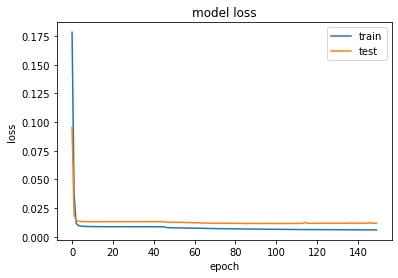

In [52]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [56]:
# make a prediction
yhat = model.predict(test_X)
yhat

array([[0.00974748],
       [0.01306027],
       [0.01005968],
       ...,
       [0.02797485],
       [0.00896064],
       [0.00767029]], dtype=float32)

In [57]:
x_test = test_X.reshape((test_X.shape[0],12))
x_test

array([[4.27513262e-02, 1.12716044e-03, 9.57991645e-02, ...,
        4.66727445e-03, 5.06257556e-03, 7.07415699e-02],
       [5.33284672e-02, 3.07897385e-04, 9.47534664e-02, ...,
        6.48034292e-03, 5.01364220e-03, 7.07401542e-02],
       [4.55798540e-02, 3.20361608e-04, 9.81114534e-02, ...,
        4.67658398e-03, 5.04728400e-03, 7.09182984e-02],
       ...,
       [1.33180240e-01, 7.21066106e-05, 6.24589420e-02, ...,
        3.45080392e-03, 7.14224850e-03, 6.75895306e-01],
       [1.31473015e-01, 1.21277242e-04, 6.27736102e-02, ...,
        3.56329637e-03, 7.20188611e-03, 6.99179797e-01],
       [1.14783732e-01, 1.03423832e-04, 6.27415182e-02, ...,
        3.54622867e-03, 7.24419333e-03, 6.00036845e-01]])

In [58]:
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df.values 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
#reframed = series_to_supervised(scaled, 1, 1)
#print(reframed.head())

In [65]:
model.save('Energy.h5')